In [1]:
# import everything

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# gather datsets and combine into one

ford = pd.read_csv("cars/ford.csv")
ford.insert(0, 'make', 'Ford')

vw = pd.read_csv("cars/vw.csv")
vw.insert(0, 'make', 'VW')

merc = pd.read_csv("cars/merc.csv")
merc.insert(0, 'make', 'Mercedes')

vauxhall = pd.read_csv("cars/vauxhall.csv")
vauxhall.insert(0, 'make', 'Vauxhall')

bmw = pd.read_csv("cars/bmw.csv")
bmw.insert(0, 'make', 'BMW')

audi = pd.read_csv("cars/audi.csv")
audi.insert(0, 'make', 'Audi')

toyota = pd.read_csv("cars/toyota.csv")
toyota.insert(0, 'make', 'Toyota')

skoda = pd.read_csv("cars/skoda.csv")
skoda.insert(0, 'make', 'Skoda')

hyundai = pd.read_csv("cars/hyundi.csv")
hyundai.insert(0, 'make', 'Hyundai')

cars = pd.concat([ford, vw, merc, vauxhall, bmw, audi, toyota, skoda, hyundai], axis=0)

In [141]:
# clean up the new dataset

cars['model'] = cars['model'].str.strip()
cars = cars[cars['year'] <= 2022]
cars['age'] = (2022 - cars['year'])
cars = cars.reset_index(drop=True)

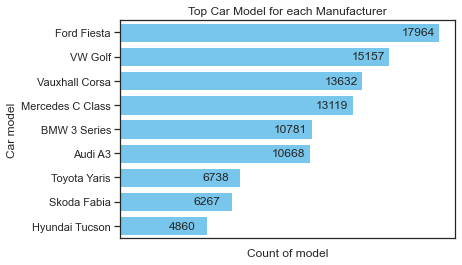

In [41]:
# Generate 2 series with columns we need
pop_c = cars.groupby('make')[['model']].agg(pd.Series.count)
pop_m = cars.groupby('make')[['model']].agg(pd.Series.mode)

# Join the 2 series together and clean the resulting dataframe
popular = pd.merge(pop_m, pop_c, right_index=True, left_index=True)
popular.rename(columns={'model_x':'model', 'model_y':"count"}, inplace=True)
popular['full'] = popular.index + ' ' + popular['model']
popular = popular.sort_values(by='count', ascending=False)

# Plot the graph
g = sns.barplot(data=popular, x='count', y='full', color="#66CCFF")
g.bar_label(g.containers[0], padding=-38, fontsize=12)
g.axes.xaxis.set_ticks([])

plt.title('Top Car Model for each Manufacturer')
plt.xlabel('Count of model')
plt.ylabel('Car model')
plt.show()

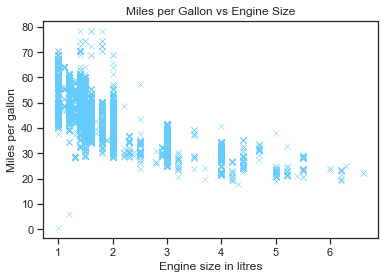

In [43]:
filt = cars[(cars['mpg'] < 80) & (cars['engineSize'] > 0)]
filt = filt[filt['fuelType'].isin(['Petrol', 'Deisel'])]
sns.scatterplot(data=filt, x='engineSize', y='mpg', marker='x', color="#66CCFF")

plt.xlabel('Engine size in litres')
plt.ylabel('Miles per gallon')
plt.title("Miles per Gallon vs Engine Size")
plt.show()

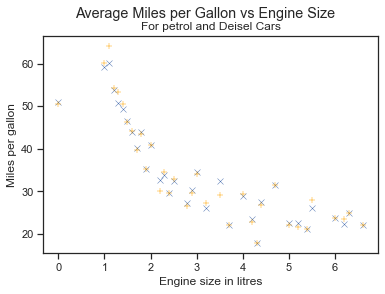

In [44]:
filt = cars[cars['fuelType'].isin(['Petrol', 'Deisel'])]
mean_mpg = filt.groupby('engineSize')[['engineSize', 'mpg']].mean()
med_mpg = filt.groupby('engineSize')[['engineSize', 'mpg']].median()#.agg(pd.Series.mode)

sns.scatterplot(data=mean_mpg, x='engineSize', y='mpg', marker='x')
sns.scatterplot(data=med_mpg, x='engineSize', y='mpg', marker='+', color='orange')

plt.xlabel('Engine size in litres')
plt.ylabel('Miles per gallon')
plt.suptitle("Average Miles per Gallon vs Engine Size")
plt.title("For petrol and Deisel Cars")
plt.show()

In [ ]:
# As engine size increases, mpg decreases
# Tight correlation becomes more spread as engine size increases

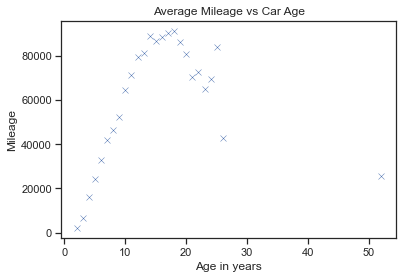

In [35]:
filt = cars.groupby('age')[['age', 'mileage']].mean()

sns.scatterplot(data=filt, x='age', y='mileage', marker='x')
plt.ylabel("Mileage")
plt.xlabel('Age in years')
plt.title('Average Mileage vs Car Age')
plt.show()

In [ ]:
# Mileage increases with age until peak around 18 years at ~95k
# Starts decreasing. Mileage can't go down but high mileage likely scrapped, only good condition/classic cars

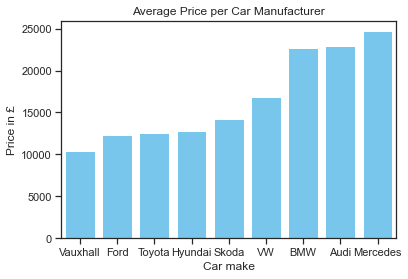

In [45]:
avg_price_per_make = pd.Series(cars.groupby('make')['price'].mean())
avg_price_per_make = avg_price_per_make.sort_values()

g = sns.barplot(data=avg_price_per_make, x=avg_price_per_make.index, y=avg_price_per_make.values, color="#66CCFF")

g.set(xticklabels=avg_price_per_make.index)
plt.xlabel("Car make")
plt.ylabel("Price in £")
plt.title('Average Price per Car Manufacturer')
plt.show()

In [ ]:
# Can compare luxury brands to cheap ones

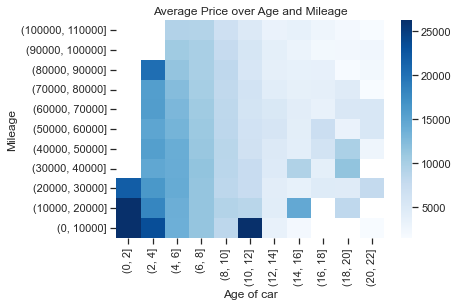

In [38]:
cars['m_binned'] = pd.cut(cars['mileage'], bins=list(range(0, 120000, 10000)))
cars['a_binned'] = pd.cut(cars['age'], bins=list(range(0, 24, 2)))

cars_pivot = cars.pivot_table(
        values='price', 
        index='m_binned', 
        columns='a_binned', 
        aggfunc=np.mean)
cars_pivot.sort_index(ascending=False, inplace=True)


sns.heatmap(cars_pivot, robust=True, cmap="Blues")

plt.ylabel('Mileage')
plt.xlabel('Age of car')
plt.title('Average Price over Age and Mileage')
plt.show()

In [ ]:
# Younger cars: higher mileage has less impact on price than age
# Older cars: mileage has bigger effect than age

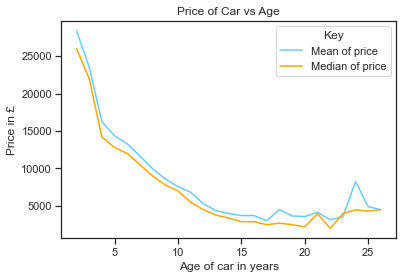

In [47]:
grp = cars[cars['age'] < 30]
mean_price = grp.groupby('age')[['age', 'price']].mean()
med_price = grp.groupby('age')[['age', 'price']].median()

mean_price['Key'] = 'Mean of price'
med_price['Key'] = 'Median of price'

sns.lineplot(data=mean_price, x='age', y='price', hue='Key', palette=["#66CCFF"])
sns.lineplot(data=med_price, x='age', y='price', hue='Key', palette=['orange'])

plt.xlabel('Age of car in years')
plt.ylabel('Price in £')
plt.title('Price of Car vs Age')
plt.show()

In [ ]:
# As age increases price decreases
# Mean higher than median, upper half of dataset skewing it. If worth more then worth a lot more
# Starts climbing around 20 years - classic cars appreciate, less valuable cars scrapped

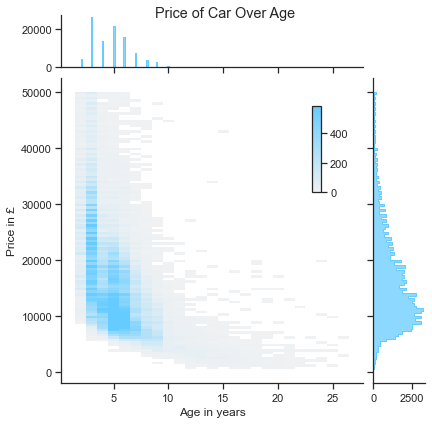

In [50]:
age_price = cars[(cars['price'] < 50000) & (cars['age'] < 30)]

sns.set_theme(style="ticks")

g = sns.JointGrid(data=age_price, x="age", y="price", marginal_ticks=True)


# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.7, .55, .02, .2])


# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#66CCFF", pmax=.8, cbar=True, cbar_ax=cax
)

g.plot_marginals(sns.histplot, element="step", color="#66CCFF")

plt.suptitle('Price of Car Over Age')
g.ax_joint.set_xlabel('Age in years')
g.ax_joint.set_ylabel('Price in £')
plt.show()

In [ ]:
# Sharp decline in price, hotspot very tall
# This tapers off as age increases, exponential depreciation

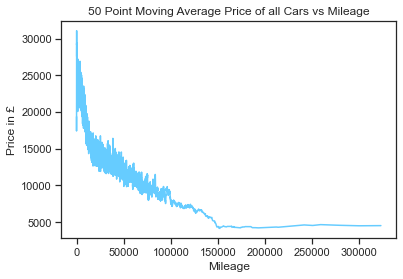

In [140]:
grp = cars.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=50, min_periods=1).mean()


sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")

plt.title('50 Point Moving Average Price of all Cars vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()

In [ ]:
# Quick drop first 25k
# Tapers off to 150k
# Fairly flat after 150k

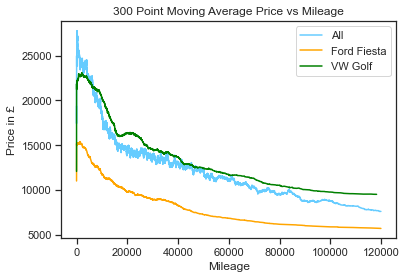

In [142]:
avg_width = 300
max_miles = 120000

grp = cars[cars['mileage'] < max_miles]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=avg_width, min_periods=1).mean()

sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")



grp = cars[(cars['model'] == 'Fiesta') & (cars['mileage'] < max_miles)]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=avg_width, min_periods=1).mean()

sns.lineplot(data=grp, x='mileage', y='price', color="orange")



grp = cars[(cars['model'] == 'Golf') & (cars['mileage'] < max_miles)]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=avg_width, min_periods=1).mean()

sns.lineplot(data=grp, x='mileage', y='price', color="green")


plt.legend(labels=['All', 'Ford Fiesta', 'VW Golf'])
plt.title(str(avg_width) + ' Point Moving Average Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()

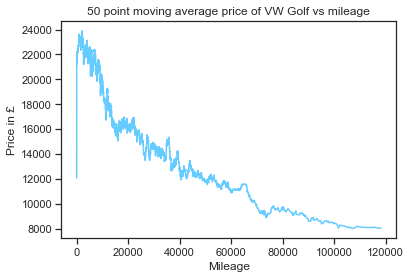

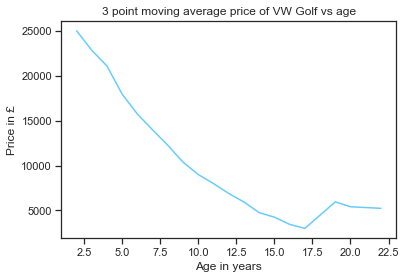

In [24]:
grp = cars[(cars['model'] == 'Golf') & (cars['mileage'] < 120000)]
grp = grp.groupby('mileage')[['mileage', 'price']].mean()
grp['price'] = grp['price'].rolling(window=50, min_periods=1).mean()


sns.lineplot(data=grp, x='mileage', y='price', color="#66CCFF")

plt.title('50 Point Moving Average Price of VW Golf vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()



grp = cars[(cars['model'] == 'Golf') & (cars['mileage'] < 120000)]
grp = grp.groupby('age')[['age', 'price']].mean()
grp['price'] = grp['price'].rolling(window=3, min_periods=1).mean()

sns.lineplot(data=grp, x='age', y='price', color="#66CCFF")

plt.title('3 Point Moving Average Price of VW Golf vs Age')
plt.xlabel('Age in years')
plt.ylabel('Price in £')
plt.show()

In [ ]:
# Compare depreciation from age to mileage

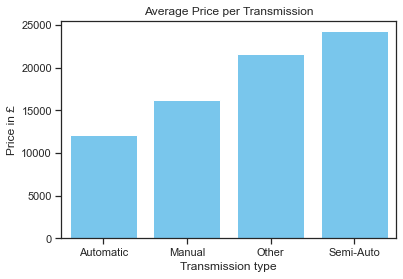

In [129]:
avg_price_tr = pd.Series(cars.groupby('transmission')['price'].mean())

g = sns.barplot(data=avg_price_tr, x=avg_price_tr.index, y=avg_price_tr.values, color="#66CCFF")

g.set(xticklabels=avg_price_tr.index)
plt.xlabel("Transmission type")
plt.ylabel("Price in £")
plt.title('Average Price per Transmission')
plt.show()

In [130]:
# Semi-auto seems to be more expensive on average - likely because sports cars have flappy paddles
# But why are auto cars cheaper?

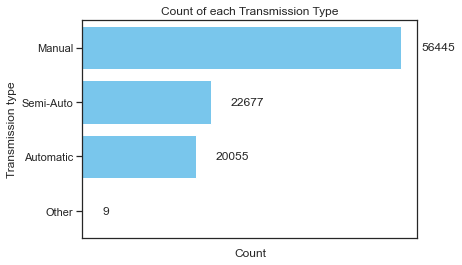

In [131]:
trans_count = cars.groupby('transmission')[['transmission']].agg(pd.Series.count)

trans_count = trans_count.rename_axis('transmission_type')
trans_count = trans_count.sort_values(by='transmission', ascending=False)
trans_count


g = sns.barplot(data=trans_count, x='transmission', y=trans_count.index, color="#66CCFF")
g.bar_label(g.containers[0], padding=20, fontsize=12)
g.axes.xaxis.set_ticks([])

plt.title('Count of each Transmission Type')
plt.xlabel('Count')
plt.ylabel('Transmission type')
plt.show()

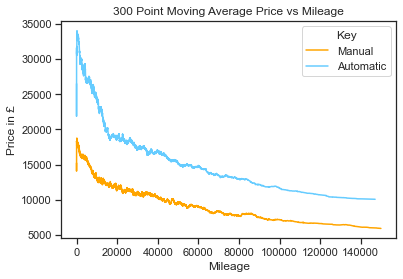

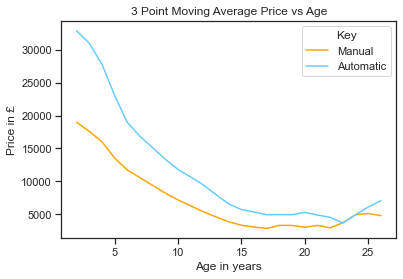

In [132]:
manu = cars[(cars['transmission'] == 'Manual') & (cars['mileage'] < 150000) & (cars['age'] < 30)]
auto = cars[(cars['transmission'] == 'Automatic') & (cars['mileage'] < 150000) & (cars['age'] < 30)]



m_grp = manu.groupby('mileage')[['mileage', 'price']].mean()
m_grp['price'] = m_grp['price'].rolling(window=300, min_periods=1).mean()

a_grp = auto.groupby('mileage')[['mileage', 'price']].mean()
a_grp['price'] = a_grp['price'].rolling(window=300, min_periods=1).mean()

m_grp['Key'] = 'Manual'
a_grp['Key'] = 'Automatic'

sns.lineplot(data=m_grp, x='mileage', y='price', palette=["orange"], hue='Key')
sns.lineplot(data=a_grp, x='mileage', y='price', palette=["#66CCFF"], hue='Key')



plt.title('300 Point Moving Average Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price in £')
plt.show()



m_grp = manu.groupby('age')[['age', 'price']].mean()
m_grp['price'] = m_grp['price'].rolling(window=3, min_periods=1).mean()

a_grp = auto.groupby('age')[['age', 'price']].mean()
a_grp['price'] = a_grp['price'].rolling(window=3, min_periods=1).mean()

m_grp['Key'] = 'Manual'
a_grp['Key'] = 'Automatic'

sns.lineplot(data=m_grp, x='age', y='price', palette=["orange"], hue='Key')
sns.lineplot(data=a_grp, x='age', y='price', palette=["#66CCFF"], hue='Key')



plt.title('3 Point Moving Average Price vs Age')
plt.xlabel('Age in years')
plt.ylabel('Price in £')
plt.show()

In [133]:
# These graphs appear to show the opposite
# Average price of manual is lower for average age and mileage
# This is what I expected originaly

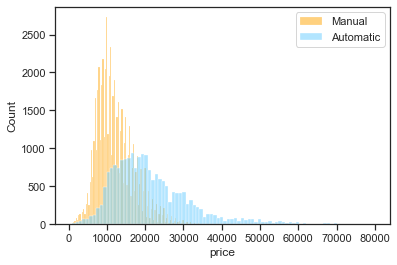

In [134]:
l_manu = manu[manu['price'] < 80000]
l_auto = auto[auto['price'] < 80000]

sns.histplot(data=l_manu, x='price', alpha=0.5, color="orange")
sns.histplot(data=l_auto, x='price', alpha=0.5, color='#66CCFF')

plt.legend(labels=['Manual', 'Automatic'])

plt.show()

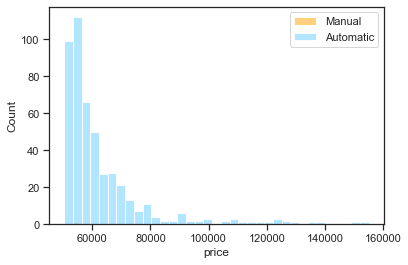

In [135]:
h_manu = manu[manu['price'] > 50000]
h_auto = auto[auto['price'] > 50000]

sns.histplot(data=h_manu, x='price', alpha=0.5, color="orange")
sns.histplot(data=h_auto, x='price', alpha=0.5, color='#66CCFF')

plt.legend(labels=['Manual', 'Automatic'])

plt.show()

In [ ]:
# This histograph filters out all cars cheaper than £50k
# We can see there are basically no manual cars above £50k
# This should pull up the average price of automatic cars which again conflicts with the original bar plot